## TS6

Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte $f_c = 300 Hz$) y un cero de transmisión en $100 Hz$. El prototipo pasabajos normalizado presenta la siguiente respuesta:

!["consigna_plantilla"](img/plantilla_consigna.JPG)

* Determine la expresión de H(s) del filtro pasa-altos normalizado
* Realizar el diagrama de polos y ceros de H(s)
* Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:

!["consigna_circuito"](img/consigna_circuito.JPG)

* Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:

!["consigna_schaumann"](img/consigna_schaumann.JPG)

## Resolución

La plantilla del filtro prototipo pasa-bajos tiene una frecuencia eliminada, lo cual me lleva a pensar que está compuesto parcialmente por un filtro notch. Proponemos:

Filtro pasa bajos de primer orden:
* $T_{LP}(S) = \frac{\omega_0}{S + \omega_0}$

Filtro Notch con denominador Butterworth de segundo orden:
* $T_N(S) = \frac{S^2 + \omega_z^2}{S^2 + S . \sqrt{2} + 1}$

Armo la transferencia del pasabajos prototipo como:

$T(S) = \frac{\omega_0^2}{\omega_z^2} . \frac{\omega_0}{S + \omega_0} . \frac{S^2 + \omega_z^2}{S^2 + S . \sqrt{2} + 1}$

Con $\omega_0 = 1$ y $\omega_z=3$:

$T(S) = \frac{1}{9} . \frac{1}{S + 1} . \frac{S^2 + 3^2}{S^2 + S . \sqrt{2} + 1}$

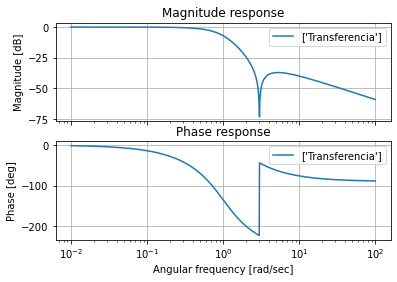

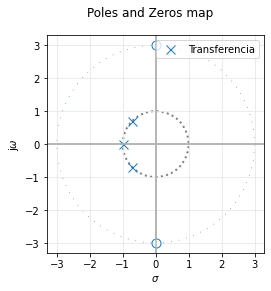

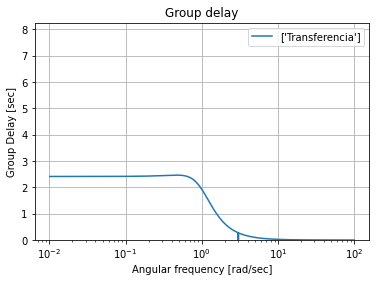

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from splane import analyze_sys

w02 = 1
wz2 = 3**2
a = w02/wz2
b = np.sqrt(2)

num = [a*1,0,a*wz2]
den = [1,(1+b), (1+b), w02]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

Se puede observar que los gráficos resultantes de la transferencia prototipo corresponden con los de los de la consigna.

Para obtener la transferencia del pasa-altos se debe utilizar la función de transformación:

$S = \frac{1}{s}$

$T(s) = \frac{1}{9} . \frac{1}{\frac{1}{s} + 1} . \frac{(\frac{1}{s})^2 + 3^2}{(\frac{1}{s})^2 + \frac{1}{s} . \sqrt{2} + 1}$

$T(s) = \frac{1}{9} . \frac{s}{s + 1} . \frac{\frac{1 + s^2 . 9}{s^2}}{\frac{1 + s . \sqrt{2} + s^2}{s^2}}$

$T(s) = \frac{1}{9} . \frac{s}{s + 1} . 9 \frac{s^2 + \frac{1}{9}}{s^2 + s \sqrt{2} + 1}$

$T(s) = \frac{s}{s + 1} . \frac{s^2 + \frac{1}{9}}{s^2 + s \sqrt{2} + 1}$

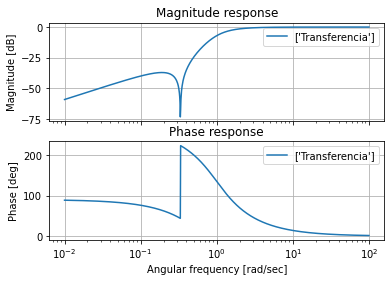

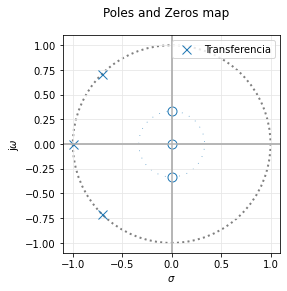

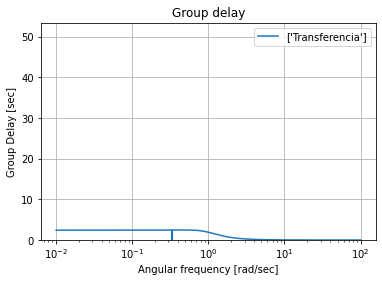

In [2]:
num = [1, 0, (1/9), 0]
den = [1, (1+np.sqrt(2)), (1+np.sqrt(2)), 1]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

Para sintetizar el filtro planteamos nodos sobre la estructura propuesta:

!["circuito_nodos"](img/circuito_nodos.jpg)

Podemos plantear las siguientes ecuaciones:

* (1): $V_A . (s . C + G_1 + G_2) - V_i . s . C - V_B . G_2 = 0$
* (2): $V_A . (G + G) - V_B . G - V_o . G = 0$
* (3): $V_A . (s . C + G) - V_o . s . C - V_i . G = 0$

Partiendo de (2):

$V_B = \frac{V_A . 2G - V_o . G}{G}$

(4): $V_B = 2 . V_A - V_o$

Reemplazando (4) en (1):

$V_A . (s . C + G_1 + G_2) - V_i . s . C - (2.V_A - V_o) . G_2 = 0$

$V_A . (s . C + G_1 + G_2) - V_i . s . C - V_A . 2G_2 + V_o . G_2 = 0$

$V_A . (s . C + G_1 - G_2) - V_i . s . C + V_o . G_2 = 0$

(5): $V_A = \frac{V_i . s . C - V_o . G_2}{s . C + G_1 - G_2}$

Reemplazando (5) en (3):

$\frac{V_i . s . C - V_o . G_2}{s . C + G_1 - G_2} . (s . C + G) - V_o . s . C - V_i . G = 0$

$\frac{V_i . s . C }{s . C + G_1 - G_2} . (s . C + G) - \frac{V_o . G_2}{s . C + G_1 - G_2} . (s . C + G) - V_o . s . C - V_i . G = 0$

$V_i . [\frac{s . C }{s . C + G_1 - G_2} . (s . C + G) - G] - V_o . [\frac{G_2}{s . C + G_1 - G_2} . (s . C + G) + s . C] = 0$

$V_i . [\frac{s^2.C^2 + s.G.C - s.G.C - G.(G_1-G_2)}{s . C + G_1 - G_2}] - V_o . [\frac{s.G_2.C+G.G_2+s^2.C^2+s.(G_1-G_2).C}{s . C + G_1 - G_2}]= 0$

$V_i . [\frac{s^2.C^2 - G.(G_1-G_2)}{s . C + G_1 - G_2}] - V_o . [\frac{G.G_2+s^2.C^2+s.G_1.C}{s . C + G_1 - G_2}]= 0$

$V_i . (s^2.C^2 - G.(G_1-G_2)) = V_o . (G.G_2+s^2.C^2+s.G_1.C)$

$ T(s) = \frac{V_o}{V_i} = \frac{s^2.C^2 - G.(G_1-G_2)}{G.G_2+s^2.C^2+s.G_1.C}$

$ T(s) = \frac{C^2}{C^2} . \frac{s^2 - \frac{G.(G_1-G_2)}{C^2}}{s^2+s.\frac{G_1.C}{C^2} + \frac{G.G_2}{C^2}}$

$ T(s) = \frac{s^2 - \frac{G.(G_1-G_2)}{C^2}}{s^2+s.\frac{G_1}{C} + \frac{G.G_2}{C^2}}$

$ T(s) = \frac{s^2 + \frac{G.(G_2-G_1)}{C^2}}{s^2+s.\frac{G_1}{C} + \frac{G.G_2}{C^2}}$

La etapa de segundo orden tiene la forma:

$\frac{s^2 + \frac{1}{9}}{s^2 + s \sqrt{2} + 1}$

Por lo tanto:

$\frac{G.(G_2-G_1)}{C^2} = \frac{1}{9}$

$\frac{G_1}{C} = \sqrt{2}$

$\frac{G.G_2}{C^2} = 1$

Asumo $C = 1$, por lo tanto:

$G_1 = \sqrt{2}$

$G . G_2 = 1$

$G = \frac{1}{G_2}$

$G . (G_2 - G_1) = \frac{1}{9}$

$\frac{1}{G_2} . (G_2 - \sqrt{2}) = \frac{1}{9}$

$1 - \frac{\sqrt{2}}{G_2} = \frac{1}{9}$

$\frac{\sqrt{2}}{G_2} = 1 - \frac{1}{9}$

$G_2 = \frac{\sqrt{2}}{1 - \frac{1}{9}}$

$G_2 = 1,59$

$G = 0,6289$

Finalmente, para la etapa de segundo orden:

$C = 1$

$R = \frac{1}{G} = 1,59$

$R_1 = \frac{1}{G_1} = 0,7071$

$R_2 = \frac{1}{G_2} = 0,6289$

Para la etapa de primer orden, tomamos un circuito RC serie donde $R = 1$ y $C = 1$

In [3]:
# Elementos normalizados
Cn = 1
Rn = 1.59
R1n = 0.7071
R2n = 0.6289
R3n = 1

# Norma de impedancia
Wz = 1000

# Norma de frecuencia
Wf = 2*np.pi*300

# Elementos desnormalizados
Cdn = Cn / (Wf* Wz)
Rdn = Rn * Wz
R1dn = R1n * Wz
R2dn = R2n * Wz
R3dn = R3n * Wz

print(f'Cdn: {Cdn}')
print(f'Rdn: {Rdn}')
print(f'R1dn: {R1dn}')
print(f'R2dn: {R2dn}')
print(f'R3dn: {R3dn}')

Cdn: 5.305164769729845e-07
Rdn: 1590.0
R1dn: 707.0999999999999
R2dn: 628.9
R3dn: 1000


### Simulación circuital

!["simulacion_circuito"](img/simulacion_circuito.JPG)

!["transferencia"](img/simulacion_transferencia.JPG)

### Comparación con la estructura propuesta en el Schaumann

Ambas estructuras están compuestas parcialmente con un GIC para implementar la etapa de segundo orden.
Sin embargo, la estructura propuesta en el ejercicio requiere de otra etapa RC para conseguir el resultado esperado, mientras que la estructura propuesta en el Schaumann es capaz de implementar un circuito Notch pasa-altos (que es lo que se pide en la consigna) sin la implementación de otro circuito cuando se cumple que:

* $a > c$
* $b = \frac{c}{2}$

El valor de $c$ establece la ganacia en baja frecuencia y $(2a-c)$ establece la ganancia en alta frecuencia.